<a href="https://colab.research.google.com/github/i-SanMartin/IAnotebooks/blob/main/IA_Notebook%234.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import numpy as np
import scipy as sc
from matplotlib import pyplot as plt

from sklearn.datasets import make_circles

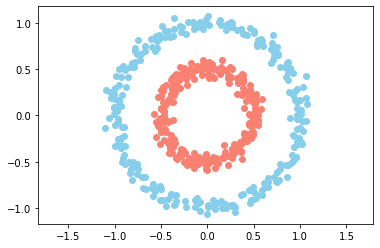

In [72]:
#Crear el dataset

n = 500 #Numero de registros
p = 2 #Caracteristicas de cada uno de los registros

X, Y = make_circles(n_samples = n, factor = 0.5, noise = 0.05)#distancia entre circulos
#En el eje Y tenemos en binario a que circulo pertenece

Y = Y[:, np.newaxis]

plt.scatter(X[Y[:, 0] == 0, 0], X[Y[:, 0] == 0, 1], c ="skyblue")
plt.scatter(X[Y[:, 0] == 1, 0], X[Y[:, 0] == 1, 1], c ="salmon")
plt.axis("equal")
plt.show()

In [68]:
#Definimos una clase para las capas, servira como estructura de dato
#n_conn = conexiones por neurona
#n_neur = neuronas en la capa
#act_f = función de activación
class neural_layer:
  def __init__(self, n_conn, n_neur, act_f):
    self.act_f = act_f
    self.b = np.random.rand(1, n_neur)      * 2 - 1
    self.W = np.random.rand(n_conn, n_neur) * 2 -1

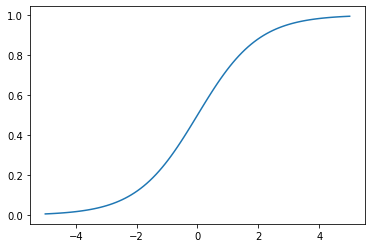

In [69]:
#Funciones de activación
sigm = (lambda x: 1 / (1 + np.e ** (-x)),
        lambda x: x * (1 - x))

relu = lambda x: np.maximum(0, x)

_x = np.linspace(-5, 5, 100)
plt.plot(_x, sigm[0](_x))

In [70]:

def create_nn(topology, act_f):

  nn = []#contiene todas las capas que conforman la red

  for l, layer in enumerate(topology[:-1]):

    nn.append(neural_layer(topology[l], topology[l+1], act_f))
    
  return nn


In [74]:
topology = [p, 4, 8, 1]#Numero de neuronas por capa (de forma arbitrario), la ultima tiene una por que la salida es binaria
neural_net = create_nn(topology, sigm)

#funcion de coste
l_cost = (lambda Yp, Yr: np.mean((Yp - Yr) ** 2), #Yp valor predicho, Yr valor real
          lambda Yp, Yr: Yp - Yr)

def train(neural_net, X, Y, l_cost, lr=0.5, train=True):
  out = [(None, X)]
  #Forward Pass
  for l, layer in enumerate(neural_net):
    z = out[-1][1] @ neural_net[l].W + neural_net[l].b #suma ponderada de parametros
    a = neural_net[l].act_f[0](z)
    out.append((z, a))

  if train:
    #Backward Pass
    deltas = []
    for l in reversed(range(0, len(neural_net))):
      z = out[l+1][0]
      a = out[l+1][1]
      if l == len(neural_net) - 1 :
        #Calcular delta de la ultima capa
        deltas.insert(0, l_cost[1](a, Y) * neural_net[l].act_f[1](a))
      else:
        #Calcuular delta respecto a capa previa
        deltas.insert(0, deltas[0] @ _W.T * neural_net[l].act_f[1](a))

      _W = neural_net[l].W

      #Gradient Descent
      neural_net[l].b = neural_net[l].b - np.mean(deltas[0], axis=0, keepdims=True) * lr
      neural_net[l].W = neural_net[l].W - out[l][1].T @ deltas[0] * lr
  return out[-1][1]

train(neural_net, X, Y, l_cost)
print("")

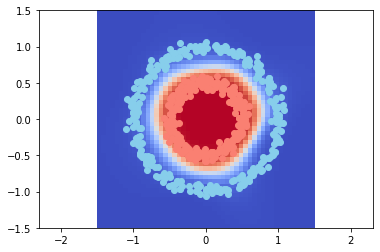

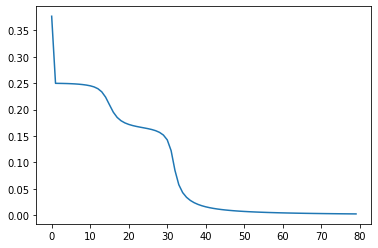

In [76]:
import time
from IPython.display import clear_output

neural_n = create_nn(topology, sigm)

loss = []

for i in range(2000):
  #Entrenar la red

  pY = train(neural_n, X, Y, l_cost, lr=0.02)  

  if i % 25 == 0:
    loss.append(l_cost[0](pY, Y))

    res = 50

    _x0 = np.linspace(-1.5, 1.5, res)
    _x1 = np.linspace(-1.5, 1.5, res)

    _Y = np.zeros((res, res))#todos los puntos del espacio

    for i0, x0 in enumerate(_x0):
      for i1, x1 in enumerate(_x1):
        _Y[i0, i1] = train(neural_n, np.array([[x0, x1]]), Y, l_cost, train = False)[0][0]
        #la predicción para cada punto

    plt.pcolormesh(_x0, _x1, _Y, cmap="coolwarm")
    plt.axis("equal")

    plt.scatter(X[Y[:,0] == 0, 0], X[Y[:,0] == 0, 1], c="skyblue")
    plt.scatter(X[Y[:,0] == 1, 0], X[Y[:,0] == 1, 1], c="salmon")

    clear_output(wait=True)
    plt.show()
    plt.plot(range(len(loss)), loss)
    plt.show()
    time.sleep(0.2)